# Импорт

In [405]:
import sys
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt


sys.path.append("../Project")
from Classes.Ant import Ant
from Classes.TrackOfWalk import TrackOfWalk

# Общие переменные

In [406]:
field_size = 12

In [407]:
feromon_map = np.random.rand(field_size, field_size)
feromon_map = (feromon_map + feromon_map.T) / 2 - 100 * np.eye(field_size)
distance_map = np.random.rand(field_size, field_size)
distance_map = (distance_map + distance_map.T) / 2 - 100 * np.eye(field_size)

In [408]:
edges = []
for i in range(field_size):
    for j in range(i, field_size):
        if i != j:
            edges.append((i, j, field_size))

In [409]:
def random_experement(ant: Ant, 
               feromon_map_updater: TrackOfWalk, 
               feromon_map: np.ndarray, 
               distance_map: np.ndarray,
               num_of_iteration: int):
    for _ in range(num_of_iteration):
        track = ant.walk(pos=[np.random.randint(0, field_size-1), 
                              np.random.randint(0, field_size-1)], 
                         distance_matrix=distance_map, 
                         feromon_matrix=feromon_map)
        feromon_map = feromon_map_updater.update(track=track, 
                                                 feromon_matrix=feromon_map)
    return feromon_map

In [410]:
def experement(ant: Ant,
               pos: iter,
               feromon_map_updater: TrackOfWalk, 
               feromon_map: np.ndarray, 
               distance_map: np.ndarray,
               num_of_iteration: int):
    for _ in range(num_of_iteration):
        track = ant.walk(pos=pos, 
                         distance_matrix=distance_map, 
                         feromon_matrix=feromon_map)
        feromon_map = feromon_map_updater.update(track=track, 
                                                 feromon_matrix=feromon_map)
    return feromon_map

# Опыт c расположением рядом.

In [411]:
ants = [Ant(walk_distance=field_size//4, a=1, b=2) for _ in range(8)]
ants_pos_each_ant_on_one_vertex = [[i, j] for j in range(7-i) for i in range(7)]
feromon_map_updater = TrackOfWalk(feromon_volume=0.0001, feromon_erosion_speed=0.0001)


In [412]:
exp_1_results = feromon_map
for _ in range(10):
    for ant, pos in zip(ants, ants_pos_each_ant_on_one_vertex):
        exp_1_results = feromon_map_updater.update(track=ant.walk(pos=pos, 
                                                                  distance_matrix=distance_map, 
                                                                  feromon_matrix=exp_1_results), 
                                                   feromon_matrix=feromon_map)

In [413]:
feromon_values = exp_1_results.reshape(1, exp_1_results.shape[0] * exp_1_results.shape[1])[0][exp_1_results.reshape(1, exp_1_results.shape[0] * exp_1_results.shape[1])[0]>=0]
feromon_values.mean()

0.5093212874671382

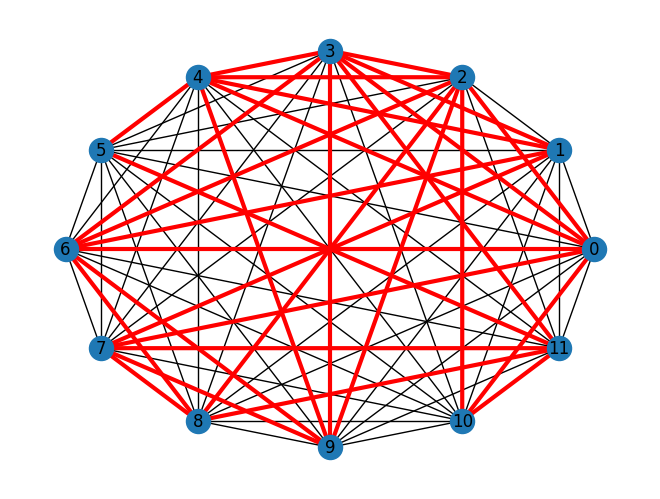

In [414]:
edges_res = []
for i in range(field_size):
    for j in range(i, field_size):
        if i != j and exp_1_results[i][j] > feromon_values.mean():
            edges_res.append((i, j, exp_1_results[i][j]))


K1 = nx.Graph()

for start, end, length in edges:
    K1.add_edge(start, end, length=length)


nx.draw_circular(K1, with_labels = True)
nx.draw_networkx_edges(K1, nx.circular_layout(K1), edgelist=edges_res, edge_color='r', arrows=True, width=3)


# Опыт c расположением через одну.

In [415]:
ants = [Ant(walk_distance=field_size//4, a=1, b=2) for _ in range(6)]
ants_pos_each_ant_on_one_vertex = [[i, i] for i in range(1, field_size, 2)]
feromon_map_updater = TrackOfWalk(feromon_volume=1, feromon_erosion_speed=0.35)


In [416]:
exp_1_results = feromon_map
for _ in range(10):
    for ant, pos in zip(ants, ants_pos_each_ant_on_one_vertex):
        exp_1_results = feromon_map_updater.update(track=ant.walk(pos=pos, 
                                                                  distance_matrix=distance_map, 
                                                                  feromon_matrix=exp_1_results), 
                                                   feromon_matrix=feromon_map)

In [417]:
feromon_values = exp_1_results.reshape(1, exp_1_results.shape[0] * exp_1_results.shape[1])[0][exp_1_results.reshape(1, exp_1_results.shape[0] * exp_1_results.shape[1])[0]>=0]
feromon_values.mean

<function ndarray.mean>

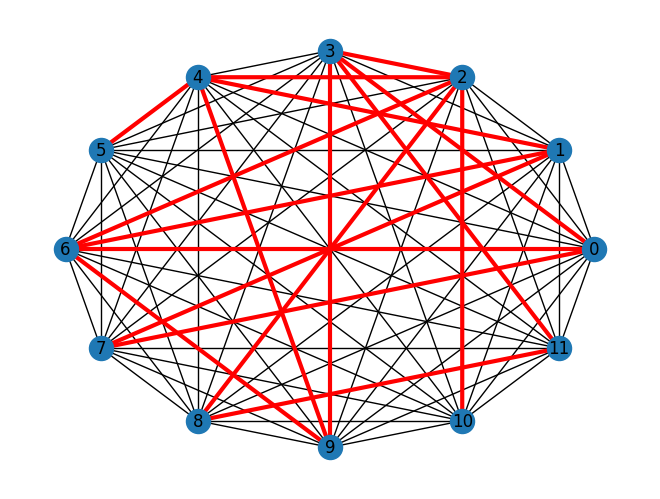

In [418]:
edges_res = []
for i in range(field_size):
    for j in range(i, field_size):
        if i != j and exp_1_results[i][j] > feromon_values.mean():
            edges_res.append((i, j, exp_1_results[i][j]))


K1 = nx.Graph()

for start, end, length in edges:
    K1.add_edge(start, end, length=length)


nx.draw_circular(K1, with_labels = True)
nx.draw_networkx_edges(K1, nx.circular_layout(K1), edgelist=edges_res, edge_color='r', arrows=True, width=3)
